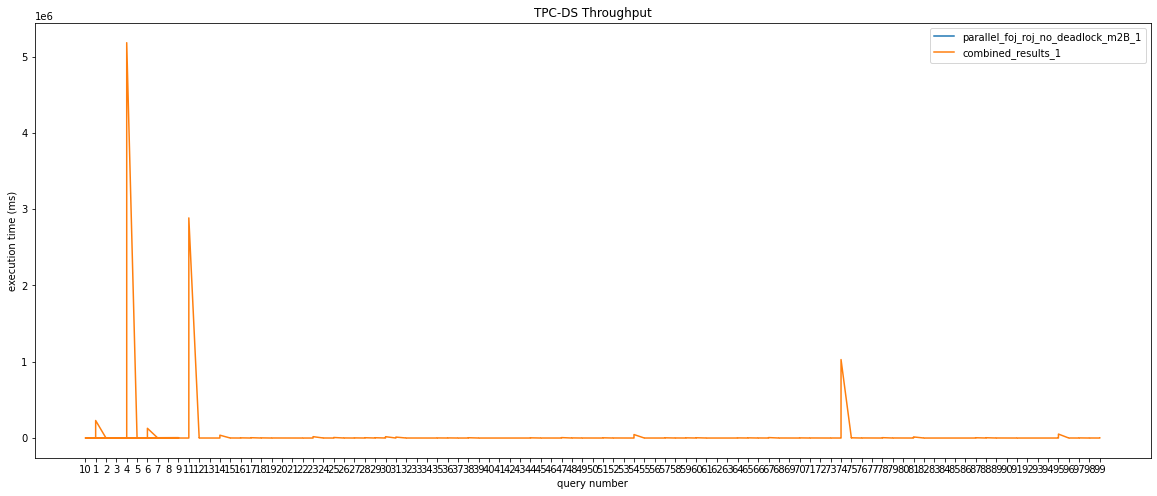

num2 1.851 is much smaller than num1 48.605
num2 1.863 is much smaller than num1 56.947


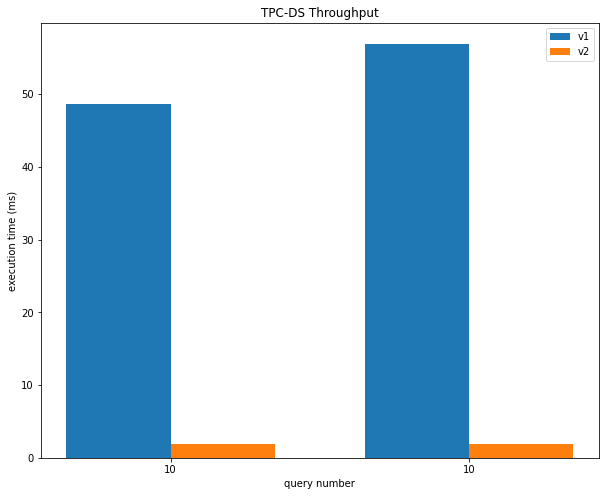

In [1]:
import json
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

result_dir = '/home/mplageman/autobench/results/tpcds'

# get all of the results files for all versions of Postgres in a list
def get_all_result_files(rdir):
    results_files = []
    for result_file in os.scandir(rdir):
        if os.path.splitext(result_file.name)[1] != '.csv':
            continue
        results_files.append(result_file)
    return results_files

# for a given result file for all queries for one version of Postgres,
# generate a list of query_num, execution time sorted by query num so that we can plot all queries for one version
def generate_plot_points(vfile):
    points = []
    with open(vfile) as csvfile:
        r = csv.reader(csvfile)
        for row in r:
            points.append((int(row[0]), float(row[1])))
    points = sorted(points)
    points = [(str(elem1), elem2) for elem1, elem2 in points]
    return points

# for a given version, all of the query_num, execution times are plotted in a line chart
# TODO: this is unreadable when all the queries are shown
def plot_all_queries_for_all_versions(versions_with_all_queries):
    fig, ax = plt.subplots(figsize=(20,8))
    ax.set(xlabel='query number', ylabel='execution time (ms)', title='TPC-DS Throughput')

    for filename, plot_points in versions_with_all_queries.items():
        version_name = os.path.splitext(filename)[0]
        ax.plot(*zip(*plot_points), label=version_name)

    plt.legend(loc='best')
    plt.show()

def big_diff(num1, num2):
    over = num1 * 1.5
    under = num1 * 0.5
    if num2 > over:
        print("num2 {} is much bigger than num1 {} ".format(num2, num1))
    if num2 < under:
        print("num2 {} is much smaller than num1 {}".format(num2, num1))
    return num2 > over or num2 < under

# for any two versions of Postgres, given the results for each TPC-DS query as a list of query,exec_time
# pairs for each version, plot the queries that are different as a bar chart comparison
# TODO: this should check for a difference bigger than some delta
def plot_all_different_queries_for_two_versions(v1_points, v2_points):
    v1_y = ()
    v2_y = ()
    xs = ()
    for t1,t2 in zip(v1_points, v2_points):
        if (big_diff(t1[1], t2[1])):
            v1_y += (t1[1],)
            v2_y += (t2[1],)
            xs += (t1[0],)
        
    N = len(xs)
    ind = np.arange(N)
    width = 0.35

    fig, ax = plt.subplots(figsize=(10,8))
    ax.set(xlabel='query number', ylabel='execution time (ms)', title='TPC-DS Throughput')

    ax.bar(ind, v1_y, width, label='v1')
    ax.bar(ind + width, v2_y, width, label='v2')

    plt.xticks(ind + width / 2, xs)

    plt.legend(loc='best')
    plt.show()


# TODO: use just the dictionary by using map
all_results_files = get_all_result_files(result_dir)
all_plot_points = [generate_plot_points(f.path) for f in all_results_files]
d = {}
for i in range(0, len(all_results_files)):
    d[all_results_files[i].name] = all_plot_points[i]

plot_all_queries_for_all_versions(d)

v1_queries = all_plot_points[0]
v2_queries = all_plot_points[1]
plot_all_different_queries_for_two_versions(v1_queries, v2_queries)
